<a href="https://colab.research.google.com/github/Sakshi3071/Bharat_Intern_Data_Science_Task-1-Stocks-Price-Prediction-using-LSTM-/blob/main/Bharat_Intern_Task_1_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-1 STOCK PRICE PREDICTION**


Take stock price of any company you
want and predicts its price by using LSTM.
Use only Jupyter notebook code

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
# import dataset
stocks = pd.read_csv("/content/AAPL.csv")

In [3]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [4]:
stocks.shape

(8042, 7)

In [5]:
stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [7]:
# Convert the date column to datetime dtype
stocks["Date"] = pd.to_datetime(stocks["Date"], format="%d-%m-%Y")

In [8]:
stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
stocks.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,8042.0,1.635192e+01,2.969813e+01,1.149550e-01,3.672660e-01,2.111071e+00,2.120420e+01,1.616800e+02
High,8042.0,1.652507e+01,3.002180e+01,1.183040e-01,3.750000e-01,2.138393e+00,2.136366e+01,1.657000e+02
Low,8042.0,1.617867e+01,2.938097e+01,1.138390e-01,3.589290e-01,2.058393e+00,2.098955e+01,1.610000e+02
Close,8042.0,1.635898e+01,2.971786e+01,1.155130e-01,3.671880e-01,2.106428e+00,2.117027e+01,1.653000e+02
Adj Close,8042.0,1.559438e+01,2.944848e+01,9.903700e-02,3.089235e-01,1.805978e+00,1.838979e+01,1.653000e+02
Volume,8042.0,3.831832e+08,3.633095e+08,2.396800e+06,1.478439e+08,2.664242e+08,4.808804e+08,7.421641e+09


In [10]:
stocks['Avg_price'] = stocks[['High','Low']].mean(axis=1)
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.266423,183198400,0.323661
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.268211,207995200,0.337054
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.269106,221513600,0.339286
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.270000,123312000,0.335938
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.271788,101572800,0.334821


In [11]:
stocks = stocks.drop(columns=['Open','Close','High','Low','Volume','Adj Close'])
stocks.head()

,Date,Avg_price
0,1990-01-02,0.323661
1,1990-01-03,0.337054
2,1990-01-04,0.339286
3,1990-01-05,0.335938
4,1990-01-08,0.334821


In [12]:
stocks.set_index('Date', inplace=True)
stocks.head()

,Avg_price
Date,
1990-01-02,0.323661
1990-01-03,0.337054
1990-01-04,0.339286
1990-01-05,0.335938
1990-01-08,0.334821


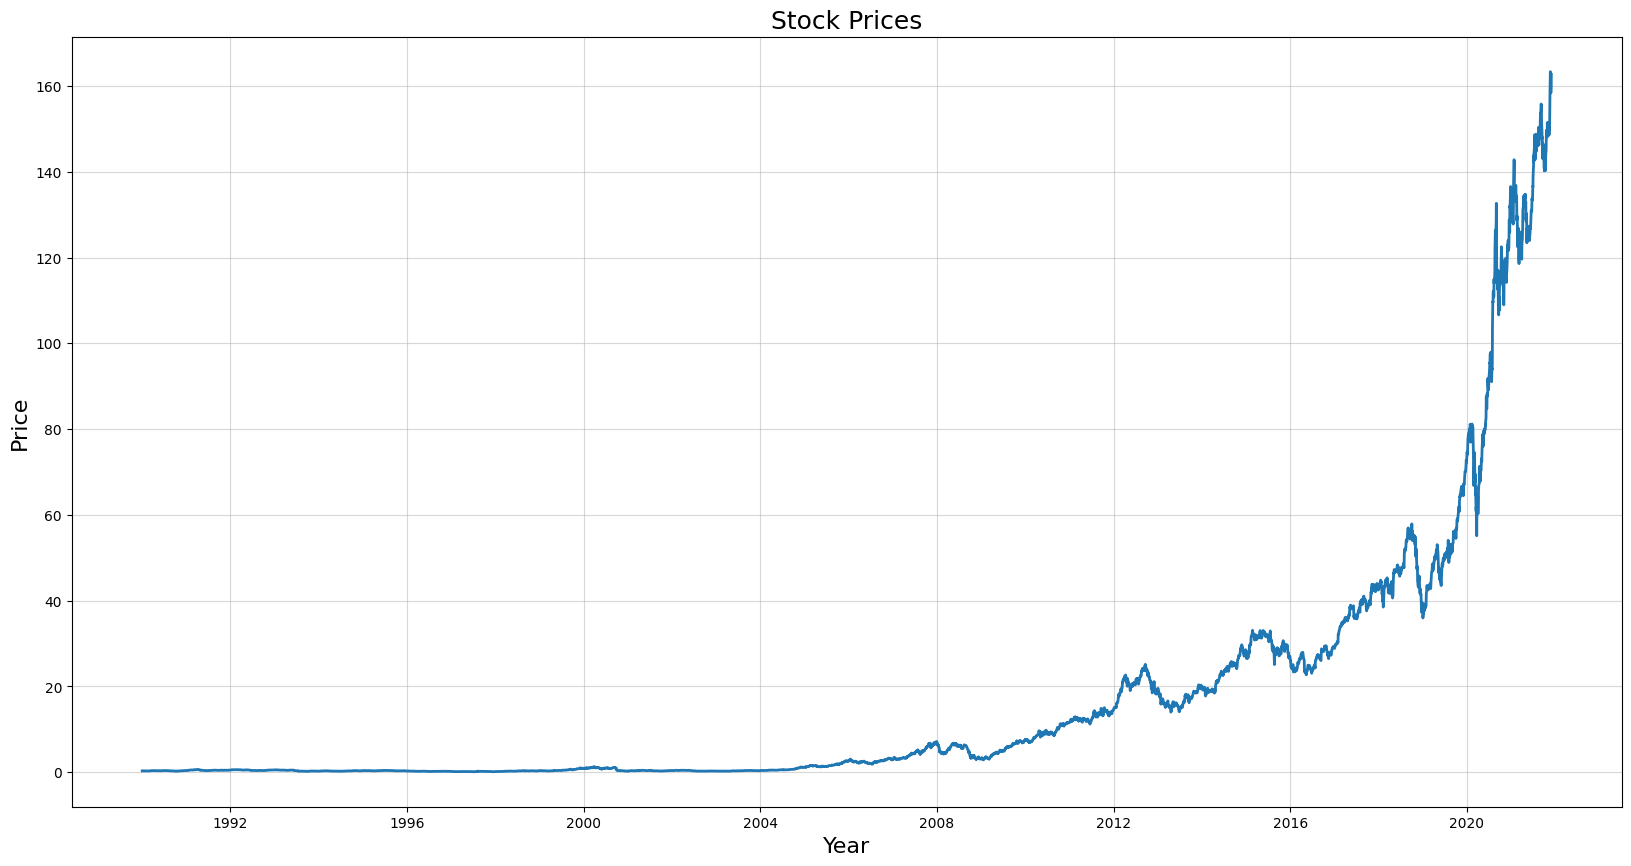

In [13]:
# Set the size of the plot
plt.figure(figsize=(20, 10))

# Plot the data
plt.plot(stocks, linewidth=2)

# Add a grid to the plot
plt.grid(alpha=0.5)

# Add labels to the axes
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)

# Add a title to the plot
plt.title('Stock Prices', fontsize=18)

# Show the plot
plt.show()

In [14]:
stocks.loc['1990-01-02']

Avg_price    0.323661
Name: 1990-01-02 00:00:00, dtype: float64

In [15]:
stocks.loc['2009-01-02']

Avg_price    3.146429
Name: 2009-01-02 00:00:00, dtype: float64

In [16]:
stocks.loc['2010-01-04']

Avg_price    7.622857
Name: 2010-01-04 00:00:00, dtype: float64

In [17]:
stocks.loc['2011-01-03']

Avg_price    11.698214
Name: 2011-01-03 00:00:00, dtype: float64

In [18]:
len(stocks.loc['1990-01-02':'2009-01-02'])

4792

In [19]:
stocks = stocks.iloc[4792:]
stocks

,Avg_price
Date,
2009-01-05,3.373036
2009-01-06,3.385000
2009-01-07,3.263571
2009-01-08,3.271250
2009-01-09,3.277143
...,...
2021-11-23,160.430001
2021-11-24,160.889999
2021-11-26,158.404999


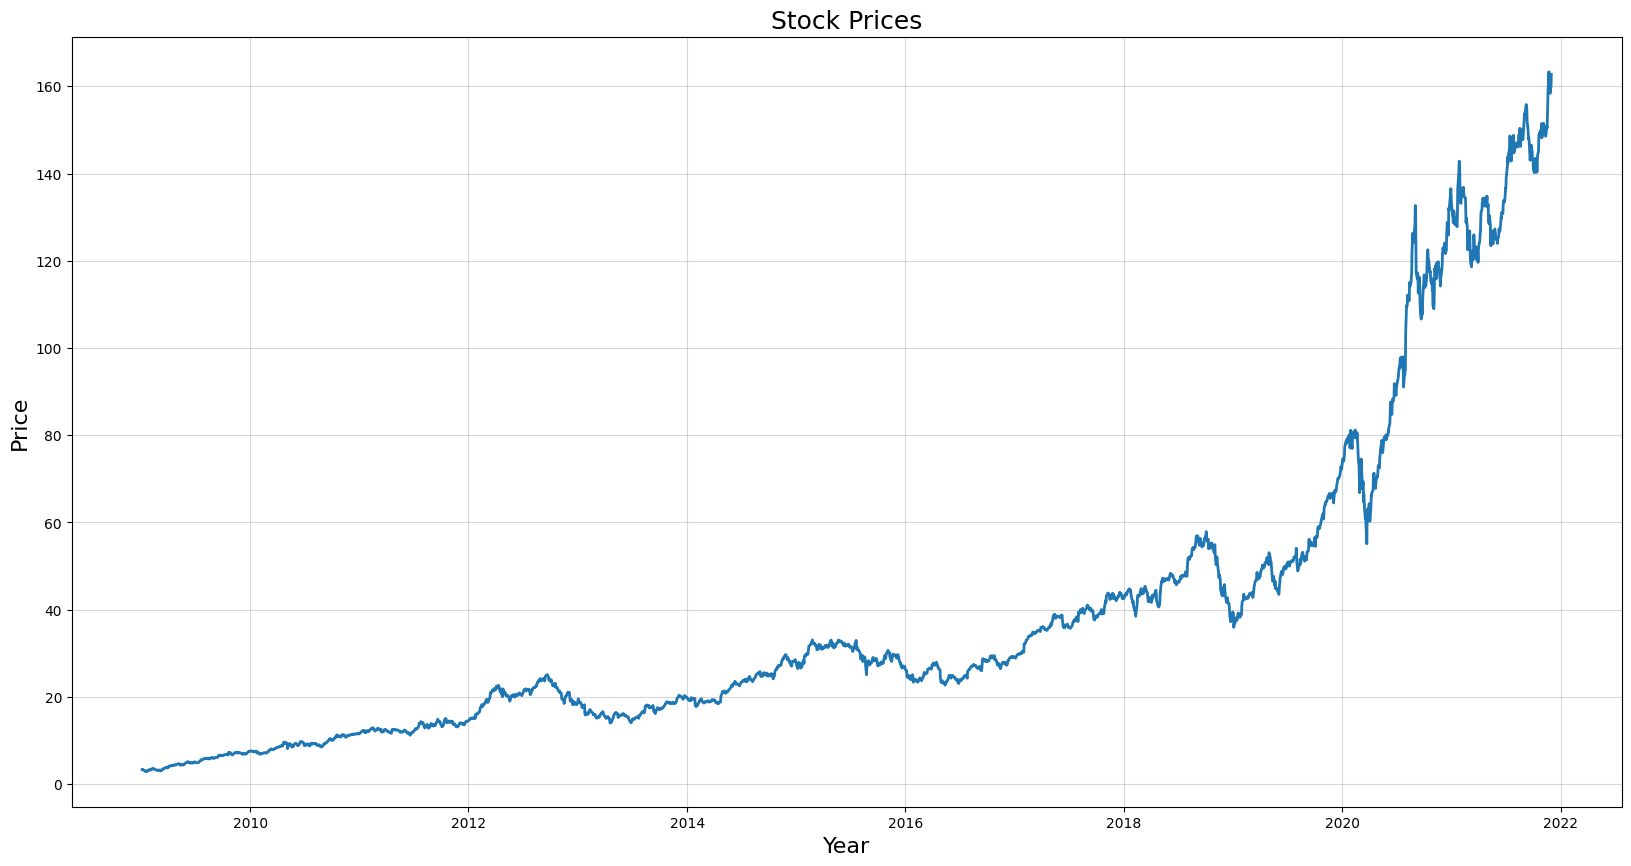

In [20]:

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Plot the data
plt.plot(stocks, linewidth=2)

# Add a grid to the plot
plt.grid(alpha=0.5)

# Add labels to the axes
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)

# Add a title to the plot
plt.title('Stock Prices', fontsize=18)

# Show the plot
plt.show();

In [21]:
test_size = 128
cutoff = len(stocks)- test_size

In [22]:
train = stocks.iloc[:cutoff]
test = stocks.iloc[cutoff:]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 126 #(6 months days considering 252 average days in a year)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model = Sequential()
n_features = 1

model.add(LSTM(100, input_shape=(length, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(25))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
X,y = generator[0]

In [29]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=32)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [31]:
# fit model
model.fit_generator(generator,epochs=40,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/40


<ipython-input-31-ad7dde2b3c89>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=40,


94/94 [==============================] - 36s 296ms/step - loss: 0.0098 - val_loss: 0.0423
Epoch 2/40
94/94 [==============================] - 26s 275ms/step - loss: 0.0025 - val_loss: 0.0159
Epoch 3/40
94/94 [==============================] - 26s 273ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 4/40
94/94 [==============================] - 26s 274ms/step - loss: 0.0028 - val_loss: 0.0787
Epoch 5/40
94/94 [==============================] - 26s 276ms/step - loss: 0.0054 - val_loss: 0.1291
Epoch 6/40
94/94 [==============================] - 26s 275ms/step - loss: 0.0026 - val_loss: 0.0056
Epoch 7/40
94/94 [==============================] - 26s 275ms/step - loss: 0.0024 - val_loss: 0.0142
Epoch 8/40
94/94 [==============================] - 26s 278ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/40
94/94 [==============================] - 26s 278ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/40
94/94 [==============================] - 26s 279ms/step - loss: 0.0013 - val_loss: 0.0010


In [33]:
# Make predictions
train_pred = model.predict(train)
test_pred = model.predict(test)

4/4 [==============================] - 0s 5ms/step


In [34]:
## Scale the predictions back to the original range
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

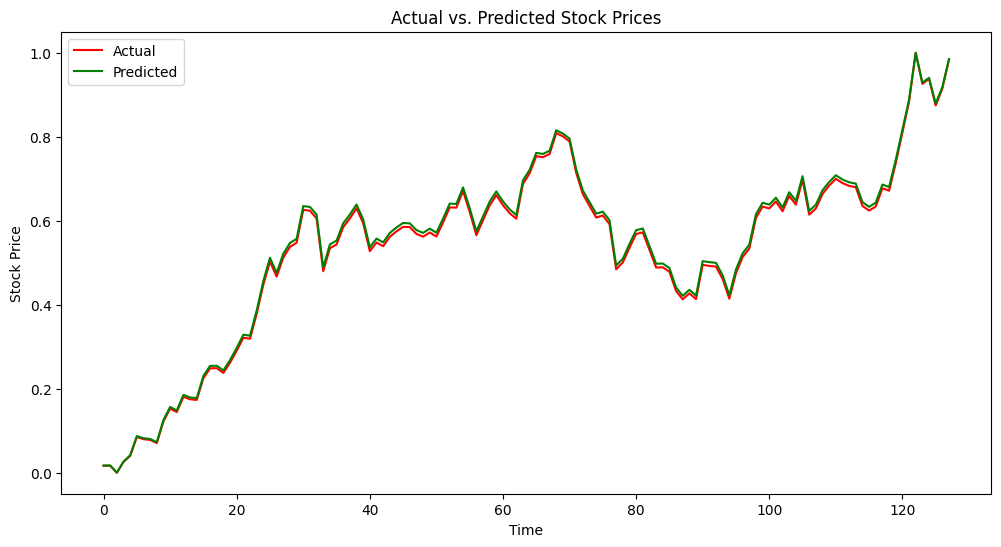

In [35]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(scaler.fit_transform(test), label='Actual',color = 'red')
plt.plot(scaler.fit_transform(test_pred), label='Predicted',color = 'green')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Calculate R-squared on the test set
r2 = r2_score(scaler.fit_transform(test), scaler.fit_transform(test_pred))
print('R-squared:', r2)


# Calculate mean absolute percentage error (MAPE) on the test set
mape = np.mean(np.abs((scaler.fit_transform(test) - scaler.fit_transform(test_pred) / np.maximum(test, 1e-8))),axis=0) * 100
print('MAPE:', mape)

R-squared: 0.9986205544990685
MAPE: Avg_price    52.974856
dtype: float64




---



---

